In [5]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.special import gammaln
import matplotlib.pyplot as plt
import time
import math
import random
from functions_scoring import count_func
from functions_scoring import score_func
import csv

In [6]:
def write_gph(dag, filename):
    with open(filename, 'w', newline="") as f:
        writer = csv.writer(f)
        writer.writerows(np.array(dag.edges()))


In [98]:
def random_neighbor(dat,graph,best_score):

    score_bench = -math.inf
    new_val = True
    nodes = list(graph.nodes())
    graph_new = graph.copy()

    ct = 0
    
    while new_val == True:

        ct += 1
        print(ct, score_bench)
        if ct > 10 and score_bench < 1.05 * best_score:
            break

        i = random.sample(nodes,k=1)
        #graph_new = graph.copy()    
        #print("i=",i)

        nodes_delta = nodes.copy()
        graph_delta = graph_new.copy()
        
        nodes_delta.remove(i[0])
        #nodes.remove(i[1])

        #
        score_new = -math.inf

        for j in range(len(nodes_delta)):

           # print(list(graph_new.edges()))

            graph_delta = graph_new.copy()
            score_temp = -math.inf

            nodes_test = nodes_delta[j]
            #print(nodes_test)

            children = list(graph_new.successors(i[0]))
            parents = list(graph_new.predecessors(i[0]))


            if nodes_test in children:

                graph_delta.remove_edge(i[0],nodes_test)
                
                score_temp = score_func(count_func(dat,graph_delta))

                if nx.is_directed_acyclic_graph(graph_delta) == True:
                    score_temp = score_func(count_func(dat,graph_delta))
                else:
                    score_temp = -math.inf

                if score_temp > score_new:
                        #print(j, "Remove Child")
                    score_new = score_temp
                    graph_new = graph_delta.copy()
                else:
                    graph_delta = graph_new.copy()


                graph_delta.add_edge(nodes_test,i[0])

                # if nx.is_directed_acyclic_graph(graph_delta) == False:
                #     graph_delta.remove_edge(nodes_test,i[0]) #First Check

                #else:
                if nx.is_directed_acyclic_graph(graph_delta) == True:
                    score_temp = score_func(count_func(dat,graph_delta))
                else:
                    score_temp = -math.inf

                if score_temp > score_new:
                    #print(j, "Swap Child")
                    score_new = score_temp
                    graph_new = graph_delta.copy()
                else:
                    graph_delta = graph_new.copy()

            elif nodes_test in parents:

                graph_delta.remove_edge(nodes_test,i[0])

                if nx.is_directed_acyclic_graph(graph_delta) == True:
                    score_temp = score_func(count_func(dat,graph_delta))
                else:
                    score_temp = -math.inf

                if score_temp > score_new:
                    #print(j, "Remove Parent")
                    score_new = score_temp
                    graph_new = graph_delta.copy()
                else:
                    graph_delta = graph_new.copy()

                graph_delta.add_edge(i[0],nodes_test)

                # if nx.is_directed_acyclic_graph(graph_delta) == False:
                #         graph_delta.remove_edge(i[0],nodes_test) #Second Check

                #else:

                if nx.is_directed_acyclic_graph(graph_delta) == True:
                    score_temp = score_func(count_func(dat,graph_delta))
                else:
                    score_temp = -math.inf

                if score_temp > score_new:
                    #print(j, "Swap Parent")
                    score_new = score_temp
                    graph_new = graph_delta.copy()
                else:
                    graph_delta = graph_new.copy()

            else:

                graph_delta.add_edge(nodes_test,i[0])

                # if nx.is_directed_acyclic_graph(graph) == False:
                #     graph_delta.remove_edge(nodes_test,i[0]) #Third Check

                #else:
                if nx.is_directed_acyclic_graph(graph_delta) == True:
                    score_temp = score_func(count_func(dat,graph_delta))
                else:
                    score_temp = -math.inf
                    #score_temp = score_func(count_func(dat,graph_delta))

                if score_temp > score_new:
                    #print(j, "New Child")
                    score_new = score_temp
                    graph_new = graph_delta.copy()
                else:
                    graph_delta = graph_new.copy()

                #graph_delta.remove_edge(nodes_test,i[0])

                graph_delta.add_edge(i[0],nodes_test)

                # if nx.is_directed_acyclic_graph(graph_delta) == False:
                #         graph_delta.remove_edge(i[0],nodes_test) #Fourth Check

                # else:

                if nx.is_directed_acyclic_graph(graph_delta) == True:
                    score_temp = score_func(count_func(dat,graph_delta))
                else:
                    score_temp = -math.inf
                

                if score_temp > score_new:
                    #print(j, "New Parent")
                    score_new = score_temp
                    graph_new = graph_delta.copy()
                else:
                    graph_delta = graph_new.copy()

            #print(score_bench, score_new)

        if score_new > score_bench:
            #print(score_new)
            new_val = True
            score_bench = score_new
        else:
            new_val = False
            #graph_new = graph_delta.copy()

    
    # edge_add = list([i[0],i[1]])
    # #print(edge_add)



    return graph_new, score_bench

In [99]:
d = pd.read_csv("data/large.csv")
df_vars = d.columns
# Create undirected graph
G = nx.Graph()
G.add_nodes_from(df_vars)
H = nx.DiGraph(G)

#random_neighbor(d,H,-math.inf)

In [96]:
score_best = -math.inf

H_best = H.copy()
H_test = H.copy()

#print(list(H_test.nodes()))

for i in range(150):

    if i > 1:
        smpl = random.sample(list(H_best.edges()),random.randint(1,5))

        H_test.remove_edges_from(list(H_test.edges()))
        H_test.add_edges_from(smpl)
    
    gph_new, score_new = random_neighbor(d,H_test,score_best)
    #print(score_best,score_new)
    if score_new > score_best:
        score_best = score_new
        H_best = gph_new.copy()
        print(i,score_best,nx.is_directed_acyclic_graph(H_best))

    if i % 10 == 0:
        print("Run:",i)

1
2
3
4
5
6
0 -534141.582857313 True
Run: 0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [4]:
d = pd.read_csv("data/small.csv")
df_vars = d.columns
# Create undirected graph
G = nx.Graph()
G.add_nodes_from(df_vars)

In [68]:
iter = 0
width = d.shape[1]
iter_init = int(3*width)
iter_count = 0
score = -math.inf
H = nx.DiGraph(G)

while iter_count < 200:

    H.remove_edges_from(list(H.edges))

    print(iter_count,iter_init)

    while iter < iter_init:
        gph = random_neighbor(H)
        df = count_func(d,gph)
        score_new = score_func(df)

        if score_new > score:
            score = score_new
            iter = 0
            iter_init = int(6*width)
            print(score)
            H_best = H.copy()

        else:
            #print(iter, iter_init)
            iter += 1
    
    iter_count += 1
    iter = 0
    iter_init = int(3* width)
        

0 150
-550964.0282912361
-550518.2239108805
-550502.3009166894
-550501.9641331893
-550317.5412658057
-548800.5562795452
-547853.8676599518
-547726.8365686442
-547574.5108997914
1 150
-547368.5915332045
-547299.1998134525
-547195.1865530759
2 150
3 150
4 150
5 150
6 150
7 150
8 150
9 150
10 150
11 150
12 150
13 150
-546167.3390449544
14 150
15 150
16 150
-544961.5841098729
-544938.01189376
-544651.0824511837
-544363.5226555971
-544014.0104405003
17 150
18 150
19 150
20 150
21 150
22 150
23 150
24 150
-543874.0899756792
-543633.3957619225
25 150
26 150
27 150
28 150
29 150
30 150
31 150
32 150
33 150
34 150
35 150
36 150
37 150
38 150
39 150
40 150
41 150
42 150
43 150
44 150
45 150
46 150
-543475.1791472432
-543343.2377131638
47 150
48 150
49 150
50 150
51 150
52 150
53 150
54 150
55 150
56 150
57 150
58 150
59 150
60 150
61 150
-542740.4586878815
-542047.5727002269
-542026.5933418942
62 150
63 150
64 150
65 150
66 150
67 150
68 150
69 150
70 150
71 150
72 150
73 150
74 150
75 150
76 15

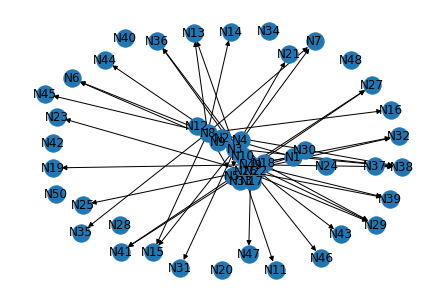

In [100]:
nx.draw(H_best, with_labels = True)

In [72]:
score_func(count_func(d,H_best))

-42003.53369858893

In [73]:
nx.is_directed_acyclic_graph(H_best)

True

In [74]:
write_gph(H_best,filename="medium.gph")

In [36]:
H1 = H.copy()
H2 = H.copy()
H3 = H.copy()

In [37]:
dict{(1,2,3),(H1,H2,H3)}

SyntaxError: invalid syntax (Temp/ipykernel_26608/1760038601.py, line 1)